In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import warnings
import matplotlib.dates as mdates
# %matplotlib widget

In [2]:
df_blackoutsnow_monthly = gpd.read_file('/Users/bato/Downloads/blockout_snow_disp_s1.geojson')
df_blackoutsnow_monthly

,frame_id,year,month,to_process,geometry
0,95,2016,7,1,"POLYGON ((174.67631 52.51530, 172.89022 52.625..."
1,96,2016,7,1,"POLYGON ((174.30093 51.19519, 172.56574 51.304..."
2,831,2016,7,1,"POLYGON ((-77.63462 33.64007, -77.94576 34.985..."
3,832,2016,7,1,"POLYGON ((-77.94234 34.97052, -78.25801 36.313..."
4,833,2016,7,1,"POLYGON ((-78.25450 36.29876, -78.57564 37.641..."
...,...,...,...,...,...
167673,46808,2024,9,1,"POLYGON ((-158.78991 58.35069, -160.86017 58.4..."
167674,46809,2024,9,1,"POLYGON ((-159.23886 57.03479, -161.23659 57.1..."
167675,46810,2024,9,1,"POLYGON ((-159.66635 55.71771, -161.59641 55.8..."
167676,46811,2024,9,1,"POLYGON ((-159.36814 54.32632, -161.94392 54.5..."


In [3]:
df_blackoutsnow_8day = gpd.read_file('/Users/bato/Downloads/blockout_snow_disp_s1_8day.geojson')
df_blackoutsnow_8day

,frame_id,start_date,end_date,mean_snowcover,to_process,geometry
0,95,2016-06-25,2016-07-02,0.138,1,"POLYGON ((174.67631 52.51530, 172.89022 52.625..."
1,96,2016-06-25,2016-07-02,0.000,1,"POLYGON ((174.30093 51.19519, 172.56574 51.304..."
2,831,2016-06-25,2016-07-02,0.561,1,"POLYGON ((-77.63462 33.64007, -77.94576 34.985..."
3,832,2016-06-25,2016-07-02,0.065,1,"POLYGON ((-77.94234 34.97052, -78.25801 36.313..."
4,833,2016-06-25,2016-07-02,0.050,1,"POLYGON ((-78.25450 36.29876, -78.57564 37.641..."
...,...,...,...,...,...,...
650175,46808,2024-09-29,2024-10-06,8.788,1,"POLYGON ((-158.78991 58.35069, -160.86017 58.4..."
650176,46809,2024-09-29,2024-10-06,16.386,1,"POLYGON ((-159.23886 57.03479, -161.23659 57.1..."
650177,46810,2024-09-29,2024-10-06,18.014,1,"POLYGON ((-159.66635 55.71771, -161.59641 55.8..."
650178,46811,2024-09-29,2024-10-06,14.647,1,"POLYGON ((-159.36814 54.32632, -161.94392 54.5..."


In [4]:
# Combine year and month into a single datetime column
df_blackoutsnow_monthly['date'] = pd.to_datetime(df_blackoutsnow_monthly[['year', 'month']].assign(day=1))
df_blackoutsnow_monthly

,frame_id,year,month,to_process,geometry,date
0,95,2016,7,1,"POLYGON ((174.67631 52.51530, 172.89022 52.625...",2016-07-01
1,96,2016,7,1,"POLYGON ((174.30093 51.19519, 172.56574 51.304...",2016-07-01
2,831,2016,7,1,"POLYGON ((-77.63462 33.64007, -77.94576 34.985...",2016-07-01
3,832,2016,7,1,"POLYGON ((-77.94234 34.97052, -78.25801 36.313...",2016-07-01
4,833,2016,7,1,"POLYGON ((-78.25450 36.29876, -78.57564 37.641...",2016-07-01
...,...,...,...,...,...,...
167673,46808,2024,9,1,"POLYGON ((-158.78991 58.35069, -160.86017 58.4...",2024-09-01
167674,46809,2024,9,1,"POLYGON ((-159.23886 57.03479, -161.23659 57.1...",2024-09-01
167675,46810,2024,9,1,"POLYGON ((-159.66635 55.71771, -161.59641 55.8...",2024-09-01
167676,46811,2024,9,1,"POLYGON ((-159.36814 54.32632, -161.94392 54.5...",2024-09-01


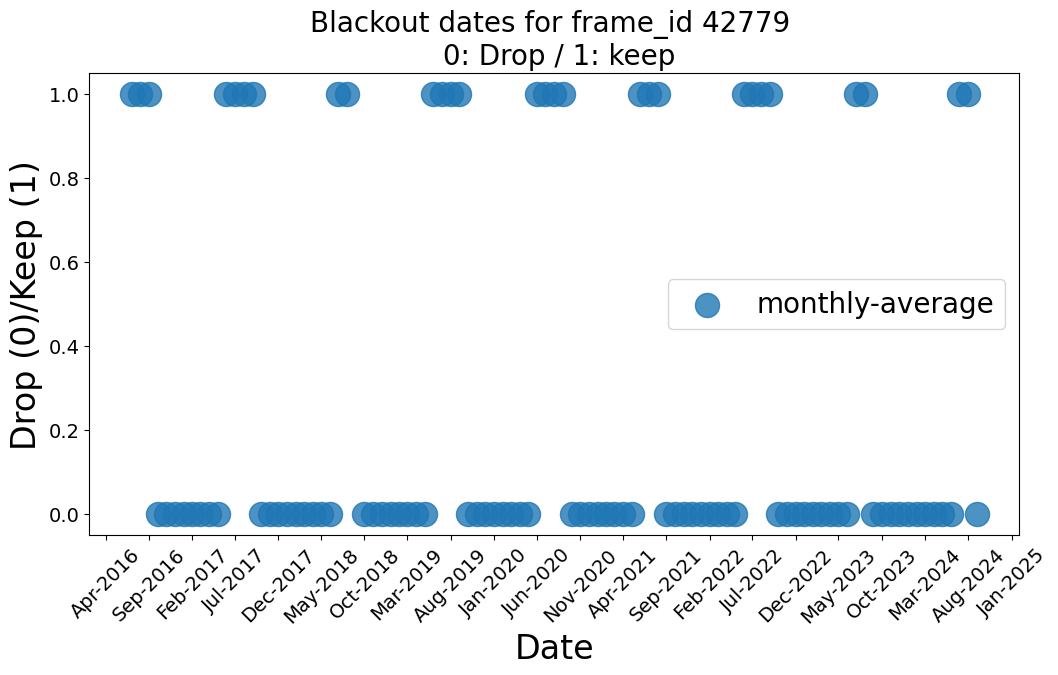

In [40]:
frame_id = 42779
Frame_monthly = df_blackoutsnow_monthly[df_blackoutsnow_monthly.frame_id==frame_id]
Frame_8day = df_blackoutsnow_8day[df_blackoutsnow_8day.frame_id==frame_id]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(Frame_monthly.date, Frame_monthly.to_process, marker='o', alpha=0.8, s=300, label='monthly-average')
# ax.scatter(Frame_8day.start_date, Frame_8day.to_process, marker='^', alpha=0.6, s=100, label='8day-average')


# Add labels and title
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Drop (0)/Keep (1)', fontsize=24)
ax.set_title(f'Blackout dates for frame_id {frame_id} \n 0: Drop / 1: keep', fontsize=20)

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show month-year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Customize tick intervals

plt.legend(fontsize=20)

In [21]:
len(Frame_monthly.to_process[Frame_monthly.to_process==1])

28

In [22]:
len(Frame_8day.to_process[Frame_8day.to_process==1])

128

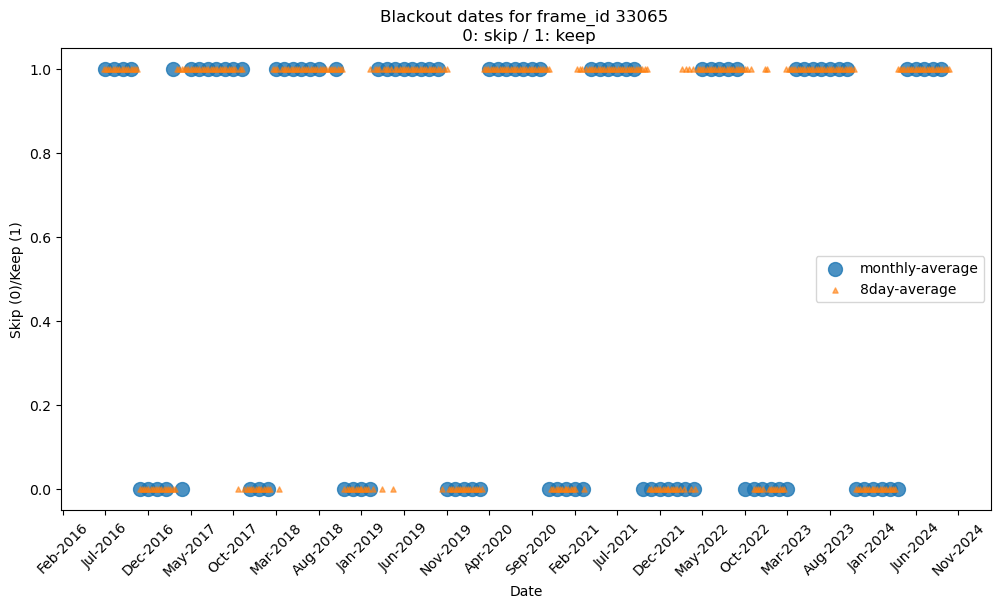

In [23]:
frame_id = 33065
Frame_monthly = df_blackoutsnow_monthly[df_blackoutsnow_monthly.frame_id==frame_id]
Frame_8day = df_blackoutsnow_8day[df_blackoutsnow_8day.frame_id==frame_id]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(Frame_monthly.date, Frame_monthly.to_process, marker='o', alpha=0.8, s=100, label='monthly-average')
ax.scatter(Frame_8day.start_date, Frame_8day.to_process, marker='^', alpha=0.6, s=14, label='8day-average')


# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Drop (0)/Keep (1)')
ax.set_title(f'Blackout dates for frame_id {frame_id} \n 0: Drop / 1: keep')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Format the x-axis to show month-year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Customize tick intervals

plt.legend()

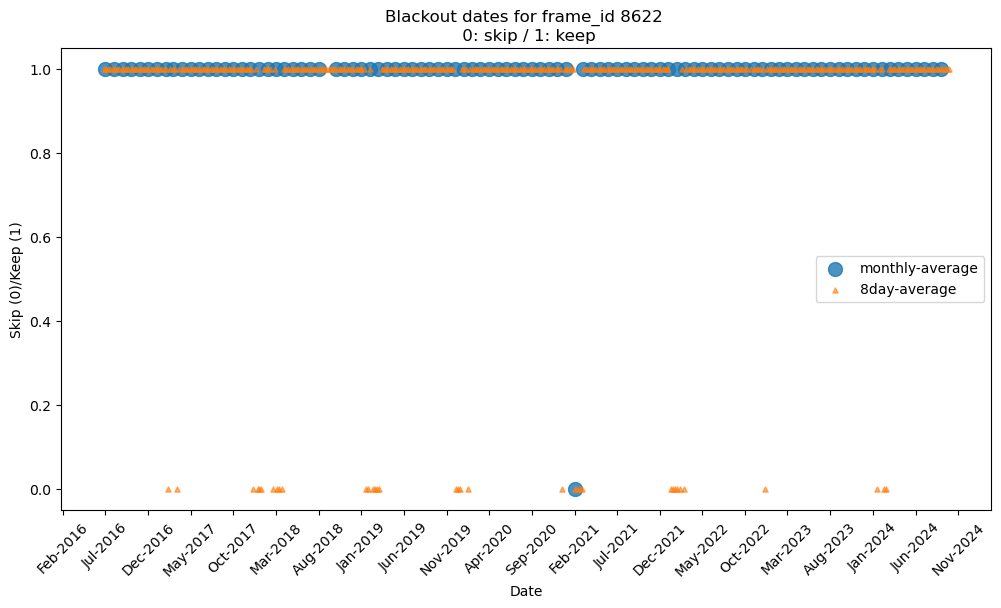

In [24]:
frame_id = 8622
Frame_monthly = df_blackoutsnow_monthly[df_blackoutsnow_monthly.frame_id==frame_id]
Frame_8day = df_blackoutsnow_8day[df_blackoutsnow_8day.frame_id==frame_id]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(Frame_monthly.date, Frame_monthly.to_process, marker='o', alpha=0.8, s=100, label='monthly-average')
ax.scatter(Frame_8day.start_date, Frame_8day.to_process, marker='^', alpha=0.6, s=14, label='8day-average')


# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Drop (0)/Keep (1)')
ax.set_title(f'Blackout dates for frame_id {frame_id} \n 0: Drop / 1: keep')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Format the x-axis to show month-year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Customize tick intervals

plt.legend()

In [ ]:
wg_df.to_file("frame38237.geojson", driver="GeoJSON")

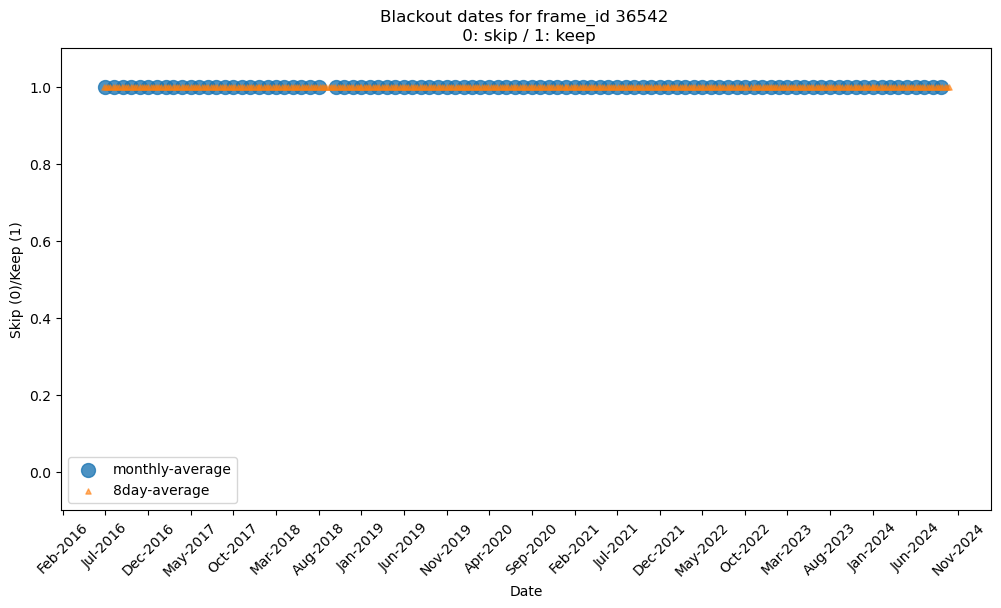

In [25]:
frame_id = 36542
Frame_monthly = df_blackoutsnow_monthly[df_blackoutsnow_monthly.frame_id==frame_id]
Frame_8day = df_blackoutsnow_8day[df_blackoutsnow_8day.frame_id==frame_id]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(Frame_monthly.date, Frame_monthly.to_process, marker='o', alpha=0.8, s=100, label='monthly-average')
ax.scatter(Frame_8day.start_date, Frame_8day.to_process, marker='^', alpha=0.6, s=14, label='8day-average')
ax.set_ylim(-0.1, 1.1)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Drop (0)/Keep (1)')
ax.set_title(f'Blackout dates for frame_id {frame_id} \n 0: Drop / 1: keep')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Format the x-axis to show month-year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Customize tick intervals

plt.legend()


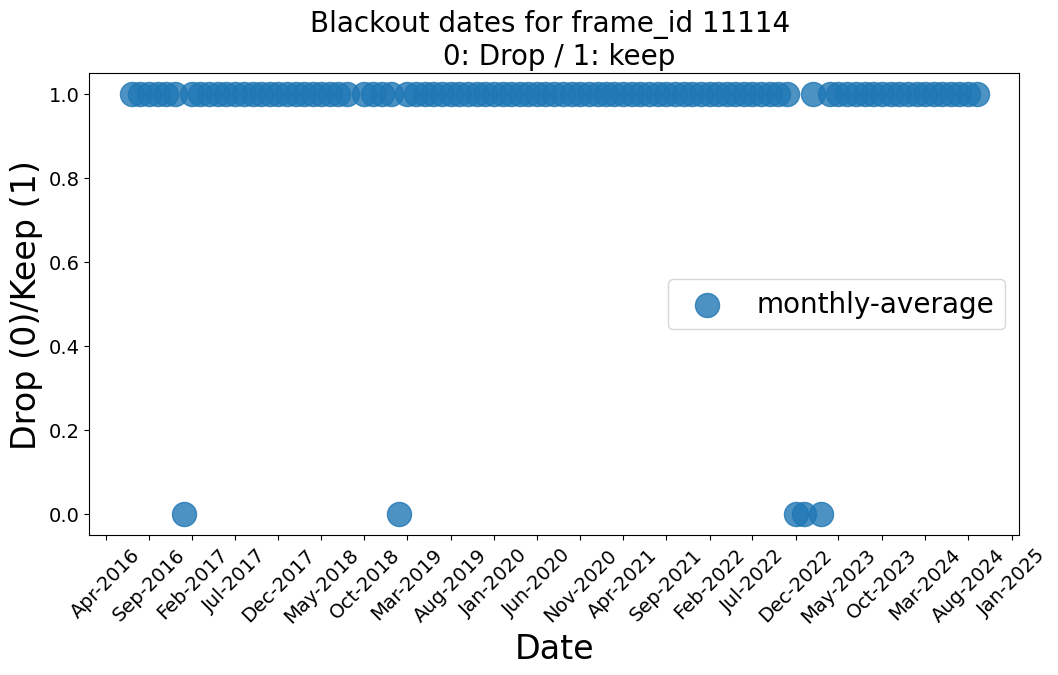

In [39]:
frame_id = 11114
Frame_monthly = df_blackoutsnow_monthly[df_blackoutsnow_monthly.frame_id==frame_id]
Frame_8day = df_blackoutsnow_8day[df_blackoutsnow_8day.frame_id==frame_id]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(Frame_monthly.date, Frame_monthly.to_process, marker='o', alpha=0.8, s=300, label='monthly-average')
# ax.scatter(Frame_8day.start_date, Frame_8day.to_process, marker='^', alpha=0.6, s=100, label='8day-average')


# Add labels and title
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Drop (0)/Keep (1)', fontsize=24)
ax.set_title(f'Blackout dates for frame_id {frame_id} \n 0: Drop / 1: keep', fontsize=20)

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show month-year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Customize tick intervals

plt.legend(fontsize=20)